In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train = pd.read_csv('train.csv.zip')
test = pd.read_csv('test.csv.zip')

In [ ]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
train['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [ ]:
train.shape

(20800, 5)

In [ ]:
train.dropna(inplace=True)
train.shape

(18285, 5)

In [ ]:
X = train.drop(['label'],axis = 1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
y = train['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [ ]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
messages = X.copy()

In [ ]:
messages.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
messages.reset_index(inplace=True)
messages.head()

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
ps = PorterStemmer()
def sentence_cleaning(df):
    sentence = []
    for sent in tqdm(df['title']):
        
        review = re.sub("[^a-zA-Z]"," ",sent)
        
        review = review.lower()
        
        review = review.split()
        
        review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
        
        review = (' ').join(review)
        
        sentence.append(review)
    return (sentence)

In [ ]:
corpus_train = sentence_cleaning(messages)

100%|██████████| 18285/18285 [00:37<00:00, 485.63it/s]


In [ ]:
corpus_train[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [ ]:
messages['title'][0:10]

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                    Why the Truth Might Get You Fired
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
5    Jackie Mason: Hollywood Would Love Trump if He...
6    Benoît Hamon Wins French Socialist Party’s Pre...
7    A Back-Channel Plan for Ukraine and Russia, Co...
8    Obama’s Organizing for Action Partners with So...
9    BBC Comedy Sketch "Real Housewives of ISIS" Ca...
Name: title, dtype: object

In [ ]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

In [ ]:
one_hot_rev = [one_hot(words,5000) for words in corpus_train]

In [ ]:
one_hot_rev[0]

[4464, 1245, 4990, 827, 2440, 2988, 608, 4785, 4688, 3433]

In [ ]:
sent_length = 20
embedded_rev = pad_sequences(one_hot_rev,padding='pre',maxlen = sent_length)
embedded_rev[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4464,
       1245, 4990,  827, 2440, 2988,  608, 4785, 4688, 3433], dtype=int32)

In [ ]:
embedded_rev.shape

(18285, 20)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding

In [ ]:
embedded_dim = 40
vocab_size =5000
model = Sequential()
model.add(Embedding(vocab_size,embedded_dim,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
X_text = np.asarray(embedded_rev)
y_label = np.asarray(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_text,y_label,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(14628, 20) (14628,)
(3657, 20) (3657,)


In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs = 10)

Epoch 1/10
458/458 [==============================] - 14s 25ms/step - loss: 0.2600 - accuracy: 0.8848 - val_loss: 0.2047 - val_accuracy: 0.9100
Epoch 2/10
458/458 [==============================] - 11s 24ms/step - loss: 0.1339 - accuracy: 0.9481 - val_loss: 0.2077 - val_accuracy: 0.9128
Epoch 3/10
458/458 [==============================] - 11s 24ms/step - loss: 0.0983 - accuracy: 0.9619 - val_loss: 0.2363 - val_accuracy: 0.9103
Epoch 4/10
458/458 [==============================] - 11s 24ms/step - loss: 0.0700 - accuracy: 0.9756 - val_loss: 0.2785 - val_accuracy: 0.9095
Epoch 5/10
458/458 [==============================] - 11s 24ms/step - loss: 0.0439 - accuracy: 0.9841 - val_loss: 0.3309 - val_accuracy: 0.9100
Epoch 6/10
458/458 [==============================] - 11s 24ms/step - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.4348 - val_accuracy: 0.9098
Epoch 7/10
458/458 [==============================] - 11s 24ms/step - loss: 0.0192 - accuracy: 0.9928 - val_loss: 0.5094 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

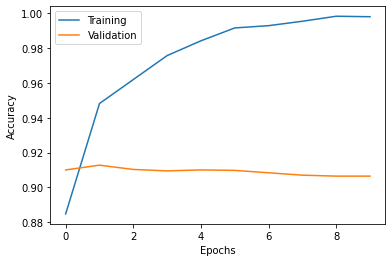

In [ ]:
plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

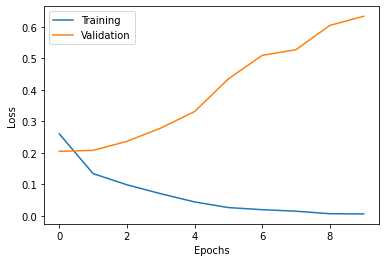

In [ ]:
plt.plot(history.history['loss'],label='Training')
plt.plot(history.history['val_loss'],label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [ ]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
test_data = pd.read_csv('test.csv.zip')

In [ ]:
test_data.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
def test(X):
    X=X.fillna(0)
    messages=X.copy()
    messages.reset_index(inplace=True)
    corpus=[]
    for i in range(len(messages)):
        reviews=re.sub('[^a-zA-Z]',' ',str(messages['title'][i]))
        reviews=reviews.lower()
        reviews=reviews.split()
        reviews=[ps.stem(word) for word in reviews if word not in stopwords.words('english')]
        reviews=' '.join(reviews)
        corpus.append(reviews)
    one_hot_rep=[one_hot(word,vocab_size)for word in corpus]
    embedded_docs = pad_sequences(one_hot_rep, padding = 'pre', maxlen = sent_length)
    X_final = np.array(embedded_docs)
    
    
    return X_final

In [ ]:
test_data_new= test(test_data)
test_data_new[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0, 2298, 4654,
        794,  434, 2391, 4547, 4428, 3339, 1225, 2006, 4714], dtype=int32)

In [ ]:
pred=model.predict(test_data_new)
print(pred.shape)

(5200, 1)


In [ ]:
pred

array([[3.6164627e-10],
       [9.9953985e-01],
       [3.9075911e-03],
       ...,
       [1.8453612e-07],
       [9.9993610e-01],
       [4.5551980e-09]], dtype=float32)

In [ ]:
submission_data = pd.read_csv('submit.csv')

In [ ]:
submission_data['label'] = np.round(pred).astype('int')

In [ ]:
submission_data.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,0
4,20804,1


In [ ]:
submission_data.to_csv('Submission.csv',index=False)

In [ ]:
output=pd.DataFrame(data=test_data['title'])
output['label']=submission_data['label']
output.head()

,title,label
0,"Specter of Trump Loosens Tongues, if Not Purse...",0
1,Russian warships ready to strike terrorists ne...,1
2,#NoDAPL: Native American Leaders Vow to Stay A...,0
3,"Tim Tebow Will Attempt Another Comeback, This ...",0
4,Keiser Report: Meme Wars (E995),1


In [ ]:
output.to_csv('Final_Submission.csv')